# Proyecto 2.
## Avances.

---
Participantes:


*   María Isabel Montoya Valladares 19169
*   Luis Pedro García Salazar 19344
* María José Morales Reichenbach 19145
* Juan Fernando de Leon Quezada  17822

### Investigación de  las técnicas que se usan para detectar patrones en lenguaje escrito
La necesidad del uso de machine learning para detectar patrones y extraer información útil en lenguaje natural o escrito ha aumentado en correlación con el crecimiento de las redes sociales, críticas en linea, encuestas y la cantidad enorme de datos que se generan hoy en día en general. Para esto, se han diseñado diversas técnicas que facilitan la detección de patrones en estos datos, para que mediante interpretaciones, se puedan sacar conclusiones que ayuden económicamente a empresas o socialmente a la población.

Entre las principales técnicas que su usan para detectar patrones en lenguaje escrito se encuentran las siguientes:
    
<ins>Reconocimiento de entidades nombradas:<ins/> 
    
Entre las técnicas mas útiles para analizar lenguaje escrito se encuentra la acción de extraer entidades en el texto. Con esta técnica se busca identificar y clasificar entidades en categorías predefinidas así como personas, lugares, organizaciones, fechas, etc. Estas técnicas se basan en reglas de gramámatica y modelos supervisados

    
<ins>Análisis de sentimiento:<ins/> 

Es la técnica de procesamiento de lenguaje natural mas usada y su mayor utilidad viene en el área de encuestas, críticas, comentarios, y cualquier lugar donde los usuarios puedan presentar sus opiniones o dar retroalimentación sobre un producto. Se basa en el proceso de determinar el tono emocional detrás de una serie de palabras para extraer información imporante sobre los cientes y sus actitudes, emociones y opiniones.  
    

<ins>Resumen de texto:<ins/> 
    
Como el nombre sugiere, esta técnica se usa para resumir grandes cuerpos de texto y se usa especialmente en artículos, noticias y artículos de investigación. Dentro de esta, existe el método de  extracción, en el cuál se hace un resumen mediante la extracción de partes del texto y la abstracción, donde se hace el resumen mediante la generación de nuevas palabras que transmiten la idea original.

<ins>Tokenización:<ins/>  
    
La tokenización en esencia, es la acción de dividir el texto entero en "tokens", que pueden existir en la forma de palabras, letras, números, puntuación, etc. con el fin de que la computadora lo entienda de una manera más eficiente. 

### Situación Problemática
Hoy en día las redes sociales ya no son plataformas que simplemente nos ayuda a conectar a personas que se encuentran en países lejanos, sino que también pueden ser usados como plataformas para establacer estrategias de diversas indoles. Twitter es una de las plataformas más populares y es usada para compartir pensamientos, situaciones, problemas, etc., por toda la población y esto tiene la importante aplicación de ser un canal de comunicación en tiempos de emergencia.

La publicación en tiempo de real de tweets provenientes de personas que se encuentran en un aprieto puede ayudar a que las autoridades puedan programar equipos de ayuda y poder salvar un mayor número de personas. Sin embargo, al ser twitter, una persona tiene toda la libertad de expresión y cada quién tiene una manera en la cuál se expresa, se pueden usar métaforas que en vez de describir algo de un desastre natural, puede que sea solo sobre algo que "is the bomb ;)" por lo que poder identificar si se está hablando de un desastre natural cierto o no es importante para poder llevar a cabo esta aplicación ya mencionada.


### Problema Ciéntifico 
El uso de metáforas que pueden confundir un analizador de texto acerca de si se encuentra analizando un tweet de un desastre natural o no. 

### Objetivos
#### Objetivo general
* Identificar palabras o frases que son frecuentes en un tweet acerca de un desastre natural real y en un tweet acerca de algo que no es un desastre natural

#### Objetivos Específicos

1. Establecer una relación entre el keyword, frases del tweet y si es un desastre natural o no (variable target).
2. Utilizar nubes de palabras para analizar las expresiones comúnes en tweets de desastres.
3. Clasificar los desastres naturales por categoría y brindar prioridad.

### Descripción de los datos
Los datos se nos presentan en un dataframe que contiene las siguientes variables:
* id: el cuál es unico para cada tweet
* keyword: palabra clave para cada tweet
* location: ubicación del tweet
* text: cuerpo del tweet
* target: si es sobre un desastre natural o no

A continuación se muestra los 10 primeros tweets para visualizar la información. 

In [42]:
import pandas as pd #libreria de visualizacion de texto
import numpy as np #libreria de operaciones matematicas
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import string
from nltk.corpus import stopwords #limpieza de datos

from wordcloud import WordCloud #graficas


datos=pd.read_csv('train (1).csv')
datos.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [43]:
datos.id.count()


7613

En el archivo podemos ver que los tipos de las columnas son los siguientes.

In [44]:
datos.dtypes


id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

En el dataset nos encontramos  con 7613 datos iniciales. Como se puede observar, en la tabla se nos muestran muchos NaN por lo que veremos cuantos y cuáles son las columnas que los contienen.

In [45]:
datos.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

Los Nan en location no son relevantes en el estudio que queremos hacer ahora por lo que estos se dejarán. Sin embargo, creemos importante los Nan en keyword por lo que los eliminaremos. 

In [46]:
datos = datos.dropna(subset=['keyword'])
datos.isnull().sum()
datos.head(10)


,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0
36,54,ablaze,Pretoria,@PhDSquares #mufc they've built so much hype a...,0
37,55,ablaze,World Wide!!,INEC Office in Abia Set Ablaze - http://t.co/3...,1
38,56,ablaze,NaN,Barbados #Bridgetown JAMAICA ÛÒ Two cars set ...,1
39,57,ablaze,Paranaque City,Ablaze for you Lord :D,0
40,59,ablaze,Live On Webcam,Check these out: http://t.co/rOI2NSmEJJ http:/...,0


In [47]:
datos.id.count()

7552

Finalizando con 7613 observaciones finales, donde las únicas variables cuantitativas son id y target. Sin embargo, se conoce que id es un valor único y que target solo puede tomar dos valores posibles, por lo que hacer gráficas estadisticas en estas variables no es útil. Por lo que se procede a hacer una tabla de frecuencias de target, location y keyword.

##### Target

In [48]:
pd.crosstab(index=datos['target'], columns='count')


col_0,count
target,
0,4323
1,3229


<AxesSubplot:>

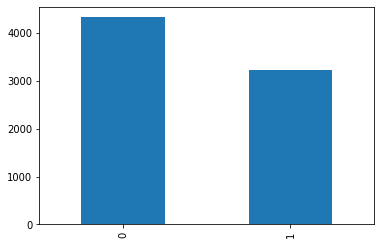

In [76]:
datos['target'].value_counts().plot(kind='bar')



Aquí podemos observar que estamos tratando con más tweets 'falsos' de desastre natural que tweets ciertos. Sin embargo, la diferencia no es tan grande entre estos dos.

##### keywords

In [50]:
pd.crosstab(index=datos['keyword'], columns='count')


col_0,count
keyword,
ablaze,36
accident,35
aftershock,34
airplane%20accident,35
ambulance,38
...,...
wounded,37
wounds,33
wreck,37


<AxesSubplot:>

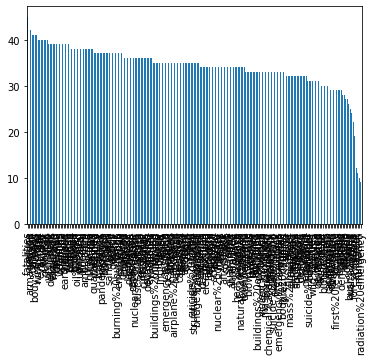

In [51]:
datos['keyword'].value_counts().plot(kind='bar')


De la gráfica podemos ver que hay keywords muy comunes como fatalities o muy poco común como radiation emergency. Algo que también nos demuestra esto es que muchos keywords tienen %20 como separador de palabras por lo que se requiere hacer limpieza de eso en esta columna. 

##### Location

In [52]:
pd.crosstab(index=datos['location'], columns='count')


col_0,count
location,
,1
Glasgow,1
"Melbourne, Australia",1
News,1
å_,1
...,...
å_: ?? ÌÑ ? : ?,1
å_å_Los Mina Cityã¢,1
å¡å¡Midwest Û¢Û¢,1


De lo que podemos observar es que la columna de location también requiere de limpieza. Pero que puede que no sea útil para un análisis de este tipo. 

#### Limpieza de datos
Ya se eliminaron los NaN de las columnas importantes y en las tablas y gráficas visto anteriormente nos dimos que cuenta que en lass columnas de location y keyword también se necesitan procesos de limpieza, no solo en tweets. Por lo que se hace primero la eliminacion de letras mayúsculas y se pasan a minúsculas.

In [53]:
datos['keyword'] = datos['keyword'].str.lower()
datos['location'] = datos['location'].str.lower()
datos['text'] = datos['text'].str.lower()

datos.head()

,id,keyword,location,text,target
31,48,ablaze,birmingham,@bbcmtd wholesale markets ablaze http://t.co/l...,1
32,49,ablaze,est. september 2012 - bristol,we always try to bring the heavy. #metal #rt h...,0
33,50,ablaze,africa,#africanbaze: breaking news:nigeria flag set a...,1
34,52,ablaze,"philadelphia, pa",crying out for more! set me ablaze,0
35,53,ablaze,"london, uk",on plus side look at the sky last night it was...,0


Se remplaza los %20 de la columna keywords por espacios.

<AxesSubplot:>

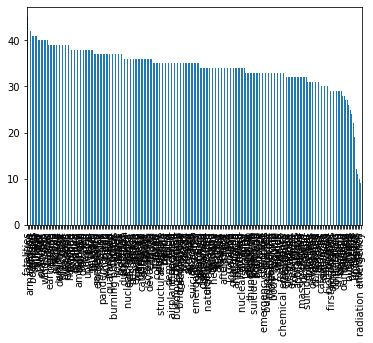

In [54]:
datos['keyword'] = datos['keyword'].str.replace('%20',' ')
datos['keyword'].value_counts().plot(kind='bar')


Eliminamos los elementos que son componentes de URLs para no tener más signos que nos interferan en el manejo de los datos durante el análisis. 

In [55]:
datos['text'] = datos['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
datos['text'] = datos['text'].apply(lambda x: re.split('http:\/\/.*', str(x))[0])

datos.head()

,id,keyword,location,text,target
31,48,ablaze,birmingham,@bbcmtd wholesale markets ablaze,1
32,49,ablaze,est. september 2012 - bristol,we always try to bring the heavy. #metal #rt,0
33,50,ablaze,africa,#africanbaze: breaking news:nigeria flag set a...,1
34,52,ablaze,"philadelphia, pa",crying out for more! set me ablaze,0
35,53,ablaze,"london, uk",on plus side look at the sky last night it was...,0


Se remueve los caracteres especiales de las columna de text para poder hacer un analisis de texto.

In [56]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text
datos['text'] = datos['text'].apply(remove_punctuations)
datos.head()

,id,keyword,location,text,target
31,48,ablaze,birmingham,bbcmtd wholesale markets ablaze,1
32,49,ablaze,est. september 2012 - bristol,we always try to bring the heavy metal rt,0
33,50,ablaze,africa,africanbaze breaking newsnigeria flag set abla...,1
34,52,ablaze,"philadelphia, pa",crying out for more set me ablaze,0
35,53,ablaze,"london, uk",on plus side look at the sky last night it was...,0


En este tipo de análisis emojis pueden ser caracteres que pueden confundir más a la computadora por lo que se eliminaran estos de la columna de tweets.

In [57]:
datos.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
datos.head()

,id,keyword,location,text,target
31,48,ablaze,birmingham,bbcmtd wholesale markets ablaze,1
32,49,ablaze,est. september 2012 - bristol,we always try to bring the heavy metal rt,0
33,50,ablaze,africa,africanbaze breaking newsnigeria flag set abla...,1
34,52,ablaze,"philadelphia, pa",crying out for more set me ablaze,0
35,53,ablaze,"london, uk",on plus side look at the sky last night it was...,0


Se remueven los stopwords de text.

In [58]:
stop = stopwords.words('english')

datos['text'] = datos['text'].str.lower().str.split() 

datos['text'] = datos['text'].apply(lambda x: [item for item in x if item not in stop])
datos['text'] = [' '.join(map(str, l)) for l in datos['text']]

datos.head()

,id,keyword,location,text,target
31,48,ablaze,birmingham,bbcmtd wholesale markets ablaze,1
32,49,ablaze,est. september 2012 - bristol,always try bring heavy metal rt,0
33,50,ablaze,africa,africanbaze breaking newsnigeria flag set abla...,1
34,52,ablaze,"philadelphia, pa",crying set ablaze,0
35,53,ablaze,"london, uk",plus side look sky last night ablaze,0


#### Análisis

Se comienza a hacer un gráfico de correlación entre las variables enteras de nuestro dataset. 

<AxesSubplot:>

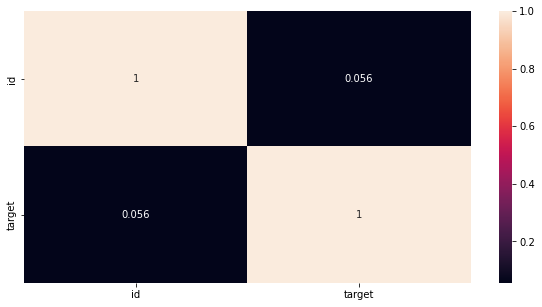

In [59]:
corr = datos.corr()
f, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(corr, cbar=True, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Como podemos ver, la verdad es que estas dos variables no se relacionan en nada por lo que no tiene sentido tener cruzar estas variables, sin embargo, si es de suma importancia y nos puede dar 'Insights' hacer gráficas de palabras dependiendo si si es un desastre natural o no. Por lo que se prosigue a dividir la base de datos en dos. 

In [60]:
noDesastre = datos.loc[datos['target'] == 0]
siDesastre = datos.loc[datos['target'] == 1]
noDesastre.head(5)



,id,keyword,location,text,target
32,49,ablaze,est. september 2012 - bristol,always try bring heavy metal rt,0
34,52,ablaze,"philadelphia, pa",crying set ablaze,0
35,53,ablaze,"london, uk",plus side look sky last night ablaze,0
36,54,ablaze,pretoria,phdsquares mufc theyve built much hype around ...,0
39,57,ablaze,paranaque city,ablaze lord,0


In [61]:
siDesastre.head(5)


,id,keyword,location,text,target
31,48,ablaze,birmingham,bbcmtd wholesale markets ablaze,1
33,50,ablaze,africa,africanbaze breaking newsnigeria flag set abla...,1
37,55,ablaze,world wide!!,inec office abia set ablaze,1
38,56,ablaze,NaN,barbados bridgetown jamaica ûò two cars set a...,1
46,66,ablaze,"greensboro,north carolina",west burned thousands wildfires ablaze califor...,1


Se obtiene un wordcloud de los desastres naturales que no son desastres naturales.

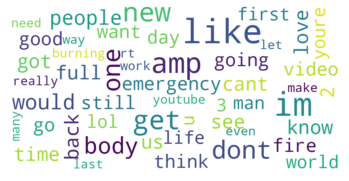

In [66]:
tc = {} #dic con counters
    
for review in noDesastre['text']:
    text = review.split(' ')
    for word in text:
        counter = tc.get(word)
        if counter:
            tc[word] = counter + 1
        else:
            tc[word] = 1

# create the WordCloud object
wordcloud = WordCloud(background_color="white",max_words=50,max_font_size=40,scale=3,random_state=1)

# generate the word cloud
wordcloud.generate_from_frequencies(tc)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Aquí podemos ver que los tweets que no son desastres naturales poseen varias veces palabras consideradas como 'positivas' entonces se puede hacer un sentiment analysis y probar que los tweets sobre desastres naturales usan palabras positivas en ellos.

Se obtiene un wordcloud del dataframe que si es de desastres.

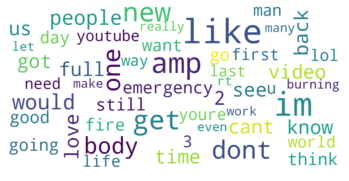

In [68]:
ntc = {} #dic con counters
    
for review in siDesastre['text']:
    text = review.split(' ')
    for word in text:
        counter = tc.get(word)
        if counter:
            ntc[word] = counter + 1
        else:
            ntc[word] = 1

# create the WordCloud object
wordcloud = WordCloud(background_color="white",max_words=50,max_font_size=40,scale=3,random_state=1)

# generate the word cloud
wordcloud.generate_from_frequencies(ntc)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

De este wordcloud podemos ver que nuestra impresión es incorrecta y estos tweets si tiene palabras positivas en esa dataframe.

##### Keywords de no desastres y de desastres

<AxesSubplot:>

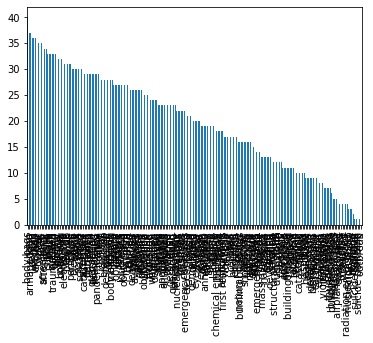

In [73]:
noDesastre['keyword'].value_counts().plot(kind='bar')


<AxesSubplot:>

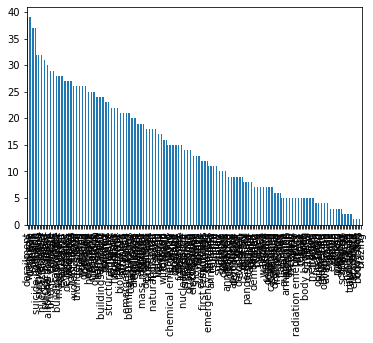

In [69]:
siDesastre['keyword'].value_counts().plot(kind='bar')
